In [389]:
import noise
import numpy as np
import matplotlib.pyplot as plt
import random
import math as m
import pandas as pd
import networkx as nx
import heapq
from collections import defaultdict
from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d


0.299935653061


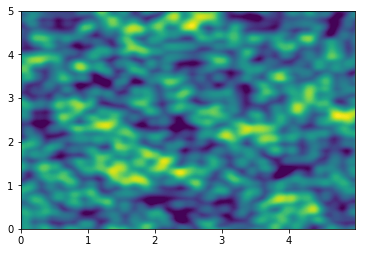

In [31]:
size = 5
points = 500
step = size/points
def genMap(size, base = 0, o = 1,p = 0.5, l =2):
    x = []
    y = []
    z = []
    mapper = []
    for i in np.arange(0.0, size, step):
        row = []
        for j in np.arange(0.0, size, step):
            h = base+noise.pnoise2(j,i, octaves = o, persistence = p, lacunarity =l)
            row.append(h)
            x.append(j)
            y.append(i)
            #h.append(noise.snoise2(j,i,octaves = o, persistence = p, lacunarity=l))
            z.append(h)
        mapper.append(row)
    
    z = [x if x>0 else 0 for x in z]
    print(np.mean(h))

    plt.tricontourf(x,y,z,100)
    plt.show()
    plt.close()
    
    #return(list(zip(x,y,h)))
    return(np.array(mapper))
    
area = genMap(size,base = 0.3, o=3, p = 1, l = 2)

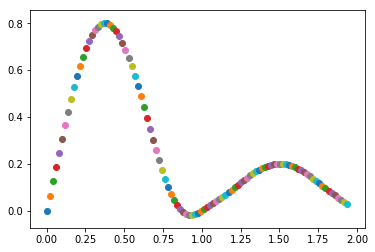

In [230]:
#1D demo
points = 256
span = 5.0
speed = 1.0

base = 0
min = max = 0

r = range(100)

for i in r:
    x = float(i)*span/points
    y = noise.pnoise1(x + base, octaves =1,persistence = 0.75, lacunarity = 10)
    plt.scatter(x,y)

   lrLat  lrLon  ulLat  ulLon  lat   lon         z    zsigma
0     10     10      0      0  5.0   5.0  0.372619  0.036529
1     10     20      0     10  5.0  15.0  0.353563  0.032248
2     10     30      0     20  5.0  25.0  0.328743  0.027172
3     10     40      0     30  5.0  35.0  0.392239  0.037113
4     10     50      0     40  5.0  45.0  0.297687  0.069320
2401


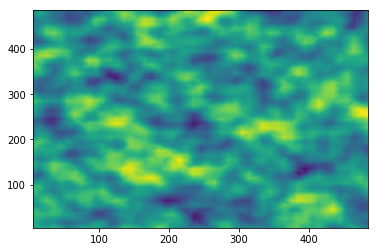

In [43]:
#	lrLat	lrLon	ulLat	ulLon	lat	lon	z	zsigma
def deriveStats(topArr, incr = 10):
    #each 1 is a degree
    #currently only works with square maps
    side = len(topArr)
        
    stats = []
    for i in range(0,side-incr,incr):
        for j in range(0,side-incr,incr):
            ulLat = i
            ulLon = j
            lrLat = i+incr
            lrLon = j+incr
            lat = np.mean((ulLat,lrLat))
            lon = np.mean((ulLon,lrLon))
            
            subarea = topArr[ulLat:lrLat,ulLon:lrLon]
            
            z = np.mean(subarea)
        
            zsigma = np.std(subarea)
            stats.append([lrLat,lrLon,ulLat,ulLon,lat,lon,z,zsigma])
            
    return(stats)
            

    
stat = deriveStats(area, incr = 10)


topoDF = pd.DataFrame(stat, columns = ['lrLat','lrLon','ulLat','ulLon',
                              'lat','lon','z','zsigma'])     

print(topoDF.head())
topoDF.to_csv('Test Terrain.csv')
print(len(topoDF))
plt.tricontourf(topoDF['lon'],topoDF['lat'],topoDF['z'],100)
plt.show()
    

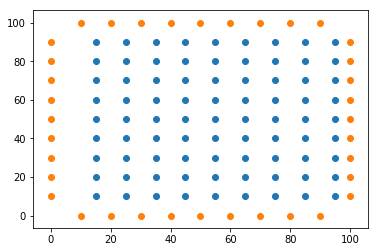

In [402]:
#generate random center point
pts = 50
x = [i for i in range(15,100,10) for x in range(10,100,10)]
y = [i for i in range(10,100,10)]*9

leftBorder = [(0,x) for x in range(10,100,10)]
rightBorder = [(100,x) for x in range(10,100,10)]
topBorder = [(x,100) for x in range(10,100,10)]
bottomBorder = [(x,0) for x in range(10,100,10)]
borders = set(leftBorder + rightBorder + topBorder + bottomBorder)

plt.scatter(x,y)
plt.scatter(*zip(*borders))


In [237]:
#create graph
corners = nx.Graph()

In [238]:
#assings x,y nodes to graph
corners.add_nodes_from(zip(x,y))

In [239]:
corners.nodes

NodeView(((11, 8), (8, 20), (8, 30), (10, 40), (8, 49), (9, 59), (9, 70), (9, 81), (10, 91), (18, 8), (19, 20), (20, 30), (21, 40), (18, 49), (21, 59), (21, 70), (20, 81), (19, 91), (28, 8), (28, 20), (29, 30), (31, 40), (30, 49), (29, 59), (28, 70), (31, 81), (29, 91), (40, 8), (38, 20), (40, 30), (39, 40), (39, 49), (41, 59), (41, 70), (39, 81), (41, 91), (49, 8), (48, 20), (51, 30), (51, 40), (50, 49), (48, 59), (50, 70), (50, 81), (48, 91), (59, 8), (61, 20), (58, 30), (59, 40), (61, 49), (60, 59), (58, 70), (58, 81), (61, 91), (68, 8), (71, 20), (68, 30), (69, 40), (69, 49), (71, 59), (69, 70), (70, 81), (69, 91), (80, 8), (78, 20), (80, 30), (80, 40), (79, 49), (78, 59), (80, 70), (79, 81), (78, 91), (88, 8), (88, 20), (90, 30), (91, 40), (91, 49), (88, 59), (89, 70), (91, 81), (89, 91)))

In [240]:
print(len(corners.nodes))

81


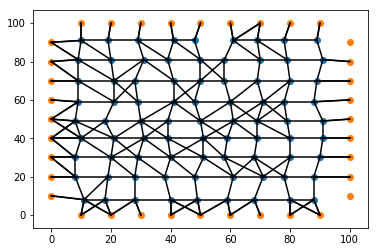

In [291]:
#finds closest 4 nodes and creates edges
dist = {}
remaining = list(corners.nodes)
'''
for b in borders:
    dist[b] = []
    for r in remaining:
        d = (m.sqrt(abs(b[0]-r[0])**2+abs(b[1]-r[1])**2))
        if not dist[b]: 
            dist[b] = [(d,r)]
        elif d < dist[b][0][0]:
            dist[b] = [(d,r)]
    d,r = dist[b][0]
    dist[r] = [(d,b)]
    
print(dist)
''' 
full = []
while remaining:
    current = remaining.pop()
    dist[current] = []
    for n in remaining + list(borders):
        d = -(m.sqrt(abs(current[0]-n[0])**2+abs(current[1]-n[1])**2))
        if len(dist[current]) < 3:
            heapq.heappush(dist[current],(d,n))  
        else:
            heapq.heappushpop(dist[current],(d,n))  
    
    for d,n in dist[current]:
        if n not in dist.keys(): dist[n] = []
        heapq.heappush(dist[n], (d,current))

for k,v in dist.items(): 
    for e in v:
        plt.plot(*zip(k,e[1]), color = 'k')
    
plt.scatter(x,y)
plt.scatter(*zip(*borders))
#plt.xlim(70,80)
#plt.ylim(70,100)

In [398]:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
points = list(zip(x,y))
tri = Delaunay(points)

In [386]:
corners = []
for n in range(len(tri.simplices)):
    idx = tri.simplices[n]
    xs = []
    ys = []
    for i in idx:
        xs.append(points[i][0])
        ys.append(points[i][1])
    corners.append((np.mean(xs),np.mean(ys)))
    


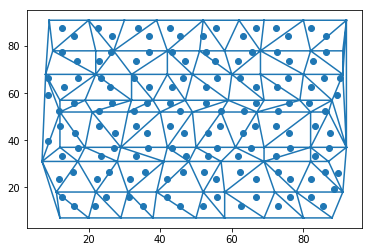

In [399]:
plt.triplot(x,y,tri.simplices.copy())
plt.scatter(*zip(*corners))
#plt.xlim(0,70)
#plt.ylim(0,70)
plt.show()

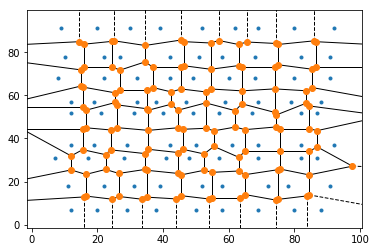

In [400]:
vor = Voronoi(points)
#plt.scatter(*zip(*points))
voronoi_plot_2d(vor)
plt.show()
